# Judul : Analisis Historis Harga Saham dengan Pendekatan Data Univariate: Studi Kasus Saham ICBP

##Pendahuluan

Harga saham merupakan salah satu indikator penting dalam dunia investasi dan keuangan, yang dapat memberikan gambaran mengenai kondisi perusahaan serta ekspektasi pasar terhadap kinerja perusahaan tersebut. Analisis harga saham secara historis dapat memberikan wawasan yang berguna bagi investor dalam membuat keputusan. Dalam penelitian ini, kami melakukan analisis univariate terhadap data historis harga saham ICBP (PT Indofood CBP Sukses Makmur Tbk) untuk mengidentifikasi pola, distribusi, dan variabilitas harga saham dari waktu ke waktu. Dengan menggunakan statistik deskriptif, seperti rata-rata, median, kuartil, dan standar deviasi, kami mencoba memahami bagaimana harga saham ICBP berfluktuasi dalam periode tertentu.

## Tujuan

Tujuan dari penelitian ini adalah untuk:

1. Menganalisis distribusi harga saham ICBP dari data historis yang tersedia.
2. Mengidentifikasi pola dan tren harga saham dalam periode tertentu.
3. Menggunakan pendekatan univariate untuk menilai tingkat variabilitas dan penyebaran harga saham.
4. Menyediakan wawasan yang dapat digunakan oleh investor dalam pengambilan keputusan investasi.

## Rumusan Masalah

Beberapa masalah utama yang akan dijawab dalam penelitian ini adalah:

1. Bagaimana distribusi harga saham ICBP dari data historis yang tersedia?
2. Apakah terdapat pola atau tren yang jelas pada pergerakan harga saham ICBP?
3. Bagaimana tingkat variabilitas harga saham ICBP diukur melalui ukuran statistik seperti standar deviasi dan rentang interkuartil?
4. Apakah harga saham cenderung meningkat, menurun, atau stabil dalam periode tertentu?

## Manfaat

Manfaat dari penelitian ini adalah sebagai berikut:

- Bagi Investor: Memberikan informasi yang lebih mendalam mengenai pola harga saham yang dapat digunakan untuk membuat keputusan investasi yang lebih baik.
- Bagi Akademisi: Menyediakan contoh konkret penerapan analisis univariate dalam dunia keuangan, khususnya dalam analisis harga saham.
- Bagi Perusahaan: Memahami bagaimana harga saham mereka dipandang oleh pasar, serta faktor-faktor yang mempengaruhi fluktuasi harga saham dari waktu ke waktu.

#Data Univariate
Data univariate adalah jenis data yang hanya memiliki satu variabel atau satu fitur. Dalam konteks statistik atau analisis data, "univariate" mengacu pada situasi di mana kita hanya mengamati atau menganalisis satu aspek atau atribut dari suatu dataset.

Ciri-ciri Data Univariate:

- Satu variabel: Hanya ada satu variabel yang diukur atau dianalisis. Misalnya, jika kita ingin menganalisis tinggi badan dari sekelompok orang, tinggi badan adalah satu-satunya variabel yang dianalisis.
- Tujuan: Fokusnya biasanya pada analisis distribusi data, misalnya untuk melihat mean (rata-rata), median, modus, variasi, dispersi (rentang, variansi, standar deviasi), atau outlier (nilai yang jauh dari nilai lainnya).
- Grafik: Grafik yang sering digunakan untuk analisis univariate meliputi histogram, box plot, atau bar chart.

In [35]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler  # Pastikan ini diimpor
import matplotlib.pyplot as plt

In [36]:
import pandas as pd

# Membaca data saham
df = pd.read_csv('icbp.csv')

# Mengubah kolom Date menjadi format datetime dan set index Date
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Menggunakan kolom 'Close' sebagai contoh untuk time series
data = df['Close'].values

# Ukuran jendela (window)
window_size = 5

print(df.head())

             Open   High    Low  Close   Adj Close       Volume
Date                                                           
2000-10-02  425.0  427.5  417.5  420.0  307.852600   40281000.0
2000-10-03  420.0  422.5  395.0  395.0  289.528076   80108000.0
2000-10-04  395.0  395.0  372.5  387.5  284.030670  142717000.0
2000-10-05  385.0  400.0  385.0  395.0  289.528076   98996000.0
2000-10-06  395.0  395.0  382.5  387.5  284.030670   32459000.0


In [37]:
# 1. Menampilkan statistik dasar
print("Statistik dasar untuk harga penutupan (Close):")
print(df['Close'].describe())

Statistik dasar untuk harga penutupan (Close):
count     4890.000000
mean      3690.623722
std       3592.694441
min        275.000000
25%        475.000000
50%       2225.000000
75%       6859.375000
max      12400.000000
Name: Close, dtype: float64


Berikut adalah penjelasan dari output statistik dasar harga penutupan (**Close**) yang dihasilkan oleh metode `.describe()`:

1. **count: 4890** : menunjukkan jumlah total pengamatan dalam kolom **Close**, yaitu 4.890 data. Artinya, ada 4.890 hari di mana harga penutupan tercatat dalam dataset ini.

2. **mean: 3690.623722** : nilai rata-rata dari semua harga penutupan dalam dataset. Rata-rata dihitung dengan menjumlahkan semua nilai dan membaginya dengan jumlah pengamatan (4890).

3. **std: 3592.694441**
   - **Standar deviasi (std)** adalah 3.592,69. Standar deviasi mengukur seberapa jauh nilai-nilai dalam dataset tersebar dari nilai rata-rata. Semakin besar standar deviasi, semakin besar variasi harga penutupan dari rata-ratanya.

4. **min: 275.000000**
   - **Min (minimum)** adalah 275. Ini adalah harga penutupan terendah yang tercatat dalam dataset. Harga penutupan saham ini tidak pernah turun di bawah 275.

5. **25%: 475.000000**
   - **25% percentile (kuartil pertama)** menunjukkan bahwa 25% dari harga penutupan berada di bawah 475. Ini berarti seperempat dari data memiliki harga penutupan lebih rendah dari 475, dan sisanya lebih tinggi.

6. **50%: 2225.000000**
   - **Median (50% percentile atau kuartil kedua)** adalah 2.225. Median adalah nilai tengah dari dataset ketika data diurutkan dari yang terkecil hingga terbesar. Ini menunjukkan bahwa setengah dari harga penutupan berada di bawah 2.225, dan setengahnya lagi di atas nilai ini. Median sering digunakan sebagai ukuran pusat yang tidak terpengaruh oleh outlier.

7. **75%: 6859.375000**
   - **75% percentile (kuartil ketiga)** menunjukkan bahwa 75% dari harga penutupan berada di bawah 6.859,38. Hanya 25% dari data yang memiliki harga penutupan lebih tinggi dari 6.859,38.

8. **max: 12400.000000**
   - **Max (maksimum)** adalah 12.400. Ini adalah harga penutupan tertinggi yang tercatat dalam dataset. Artinya, harga saham ini pernah mencapai puncak 12.400.

### Kesimpulan:
- Harga penutupan bervariasi dengan sangat luas, dari 275 hingga 12.400.
- Ada perbedaan besar antara kuartil pertama (475) dan kuartil ketiga (6.859,38), menunjukkan bahwa distribusi harga penutupan sangat tidak simetris.
- Rata-rata (mean) adalah 3.690,62, tetapi karena median (2.225) lebih rendah dari rata-rata, hal ini menunjukkan bahwa distribusi harga penutupan condong ke kanan (**skewed right**), kemungkinan disebabkan oleh beberapa nilai harga yang sangat tinggi.

In [38]:
# 2. Moving average (rata-rata bergerak)
df['Moving_Avg'] = df['Close'].rolling(window=window_size).mean()
# Menampilkan 10 baris pertama dengan kolom Moving_Avg
print(df[['Close', 'Moving_Avg']].head(10))

            Close  Moving_Avg
Date                         
2000-10-02  420.0         NaN
2000-10-03  395.0         NaN
2000-10-04  387.5         NaN
2000-10-05  395.0         NaN
2000-10-06  387.5       397.0
2000-10-09  377.5       388.5
2000-10-10  375.0       384.5
2000-10-11  385.0       384.0
2000-10-12  390.0       383.0
2000-10-13  395.0       384.5


Pada output yang Anda tampilkan, kolom **`Moving_Avg`** menunjukkan nilai rata-rata bergerak (moving average) dengan ukuran jendela 5 hari untuk kolom **`Close`**. Mari kita jelaskan bagian-bagian dari output tersebut:

### Penjelasan:

1. **Nilai `NaN` di Moving_Avg:**
   - Untuk baris pada tanggal **2000-10-02** hingga **2000-10-05**, nilai pada kolom **`Moving_Avg`** adalah `NaN` (Not a Number). Ini karena rata-rata bergerak dengan ukuran jendela **5 hari** tidak dapat dihitung sampai Anda memiliki setidaknya **5 data** harga penutupan sebelumnya.
   - Pada tanggal **2000-10-06**, jumlah data sudah mencapai 5 hari, sehingga nilai moving average mulai dihitung.

2. **Perhitungan Moving Average:**
   - Pada **2000-10-06**, nilai rata-rata bergerak untuk 5 hari dihitung dari data harga penutupan selama lima hari sebelumnya (2000-10-02 hingga 2000-10-06):
     
$$
\text{Moving_Avg} = \frac{420.0 + 395.0 + 387.5 + 395.0 + 387.5}{5} = 397.0
$$

   
   - Pada **2000-10-09**, moving average dihitung dari periode 2000-10-03 hingga 2000-10-09:
     
$$
\text{Moving_Avg} = \frac{395.0 + 387.5 + 395.0 + 387.5 + 377.5}{5} = 388.5
$$

   - Perhitungan moving average ini terus bergeser setiap hari, dengan hanya menggunakan 5 data terakhir dari harga penutupan untuk menghitung rata-ratanya.

3. **Contoh lain (Moving Average pada 2000-10-13):**
   - Moving average pada tanggal **2000-10-13** dihitung dari 5 harga penutupan sebelumnya (2000-10-09 hingga 2000-10-13):
    
$$
\text{Moving_Avg} = \frac{377.5 + 375.0 + 385.0 + 390.0 + 395.0}{5} = 384.5
$$



### Kesimpulan:
- **Nilai `NaN` di awal** wajar karena belum cukup data untuk menghitung moving average.
- Setelah ada 5 data harga penutupan, moving average dihitung dengan menggunakan **5 harga penutupan terakhir**.
- Nilai **Moving Average** memperlihatkan **rata-rata pergerakan harga penutupan** selama 5 hari terakhir, yang membantu mengidentifikasi tren jangka pendek.

Moving average ini berguna untuk melihat tren dan mengurangi fluktuasi jangka pendek dalam data saham.

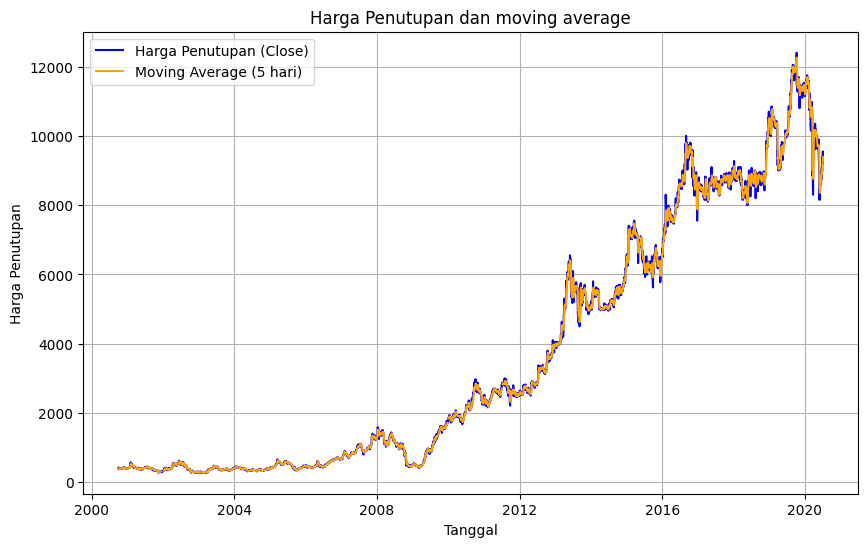

In [39]:
# 3. Visualisasi harga penutupan dan moving average
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Harga Penutupan (Close)', color='blue')
plt.plot(df.index, df['Moving_Avg'], label=f'Moving Average ({window_size} hari)', color='orange')
plt.title('Harga Penutupan dan moving average')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.grid(True)
plt.show()

Grafik yang dilampirkan menunjukkan hubungan antara **harga penutupan saham (Close)** dan **moving average (rata-rata bergerak)** selama periode waktu tertentu.

### Penjelasan Grafik:
1. **Sumbu Y (Harga Penutupan)**:
   - Sumbu vertikal menunjukkan harga penutupan saham dalam satuan mata uang, yang berkisar dari **0 hingga 12.000**.
   - Harga penutupan meningkat secara signifikan dari tahun 2000 hingga mendekati tahun 2020.

2. **Sumbu X (Tanggal)**:
   - Sumbu horizontal menunjukkan **waktu** (tanggal), dimulai dari sekitar **tahun 2000 hingga mendekati 2020**.
   - Grafik memperlihatkan perubahan harga saham dan moving average dalam rentang waktu hampir 20 tahun.

3. **Garis Biru (Harga Penutupan / Close)**:
   - Garis biru adalah representasi dari **harga penutupan saham** setiap harinya.
   - Ada **fluktuasi yang cukup besar**, terutama di tahun-tahun terakhir (setelah 2010), dengan lonjakan besar di beberapa periode (misalnya sekitar 2016 dan mendekati 2020).

4. **Garis Oranye (Moving Average 5 Hari)**:
   - Garis oranye adalah **moving average** untuk jangka waktu **5 hari**, yang membantu memperhalus fluktuasi harga saham.
   - Garis moving average bergerak lebih halus dibandingkan dengan garis harga penutupan, karena menghitung rata-rata 5 hari sebelumnya untuk setiap titik data.
   - Garis ini mengikuti tren harga penutupan, tetapi karena ini rata-rata bergerak, sedikit tertunda dalam merespons perubahan yang sangat mendadak.

### Analisis dari Grafik:
- **Tren jangka panjang** menunjukkan bahwa harga saham mengalami kenaikan yang signifikan dari sekitar tahun 2008 hingga 2020. Ada beberapa periode penurunan besar, seperti di tahun **2016** dan di sekitar **2020**, yang juga terlihat dalam moving average.
- **Moving average** lebih halus daripada harga penutupan karena ia meratakan lonjakan dan penurunan jangka pendek, memberikan gambaran yang lebih jelas tentang **tren jangka menengah**.
- Grafik ini berguna untuk melihat pola besar dalam pergerakan harga saham dan mengurangi dampak dari fluktuasi harian yang bisa mengaburkan tren jangka panjang.

Secara keseluruhan, grafik ini menunjukkan bahwa meskipun harga penutupan saham berfluktuasi setiap hari, tren keseluruhan menunjukkan peningkatan yang stabil selama periode waktu yang cukup panjang, dengan beberapa periode koreksi atau penurunan harga.

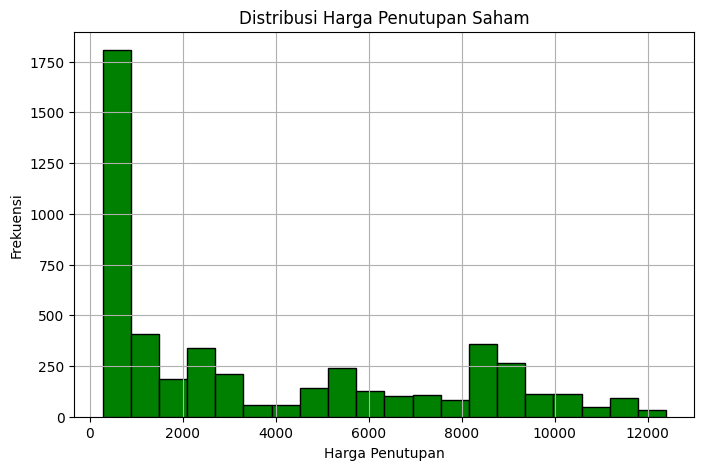

In [40]:
# 4. Histogram untuk melihat distribusi data
plt.figure(figsize=(8, 5))
plt.hist(df['Close'], bins=20, color='green', edgecolor='black')
plt.title('Distribusi Harga Penutupan Saham')
plt.xlabel('Harga Penutupan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

**1. Analisis Histogram:**
- Frekuensi Harga Rendah Lebih Tinggi:
Bar pertama yang mewakili harga penutupan antara 0 hingga 2000 memiliki frekuensi tertinggi. Ini menunjukkan bahwa sebagian besar harga penutupan berada di rentang yang relatif rendah, sekitar 0 hingga 2000.
Sebaran Harga Penutupan:

- Setelah bin pertama, frekuensi harga penutupan mulai menurun. Namun, ada beberapa bar yang menonjol di sekitar rentang 6000-8000 dan 8000-10000, menunjukkan bahwa harga penutupan juga sering berada pada rentang tersebut, meskipun tidak sebanyak pada harga rendah.
Harga penutupan di atas 10.000 terjadi sangat jarang, terlihat dari bar yang jauh lebih kecil pada rentang harga tersebut.

**2. Distribusi Positif Skewed:**

- Histogram ini menunjukkan distribusi yang miring ke kanan (positively skewed). Sebagian besar harga penutupan berada di kisaran rendah (di bawah 2000), dengan beberapa harga yang lebih tinggi dalam jumlah yang lebih sedikit.


Kesimpulan:
- Sebagian besar harga penutupan saham dalam dataset berada pada rentang 0 hingga 2000, yang terlihat dari frekuensi yang sangat tinggi di bin pertama.
- Ada juga beberapa puncak pada rentang harga yang lebih tinggi, tetapi harga penutupan yang berada di atas 8000 lebih jarang terjadi.
- Pola ini menunjukkan bahwa harga saham sering diperdagangkan di harga yang lebih rendah, tetapi ada beberapa periode di mana harga meningkat secara signifikan.

In [41]:
# 5. Menghitung statistik tambahan seperti variansi dan standar deviasi
varian = np.var(data)
std_deviasi = np.std(data)

print(f"Variansi dari harga penutupan: {varian}")
print(f"Standar deviasi dari harga penutupan: {std_deviasi}")

Variansi dari harga penutupan: nan
Standar deviasi dari harga penutupan: nan


In [42]:
#Cek apakah ada nilai NaN dalam kolom harga penutupan
print(df['Close'].isna().sum())

70


In [43]:
#Mengisi atau Menghapus Nilai NaN:
df['Close'] = df['Close'].dropna()

#Menggunakan Assignment Langsung
df['Close'] = df['Close'].fillna(df['Close'].mean())


#Setelah memastikan tidak ada nilai NaN, coba hitung kembali:
variansi = df['Close'].var()
std_deviasi = df['Close'].std()
print(f"Variansi: {variansi}")
print(f"Standar Deviasi: {std_deviasi}")


Variansi: 12725254.97280664
Standar Deviasi: 3567.247534557511


##Box Plot
**Box plot** (atau *box-and-whisker plot*) adalah jenis grafik yang digunakan untuk menggambarkan distribusi data melalui lima angka ringkasan, yaitu:

1. **Minimum**: Nilai terendah dalam dataset.
2. **Kuartil Pertama (Q1)**: Nilai di bawah 25% dari data, yang menunjukkan batas bawah dari kuartil pertama.
3. **Median (Q2)**: Nilai tengah yang membagi dataset menjadi dua bagian yang sama, di mana 50% data berada di bawah nilai ini.
4. **Kuartil Ketiga (Q3)**: Nilai di bawah 75% dari data, yang menunjukkan batas atas dari kuartil ketiga.
5. **Maksimum**: Nilai tertinggi dalam dataset.

### Bagian-Bagian Box Plot
- **Box (Kotak)**: Menggambarkan rentang interkuartil (IQR), yaitu rentang antara Q1 dan Q3. Ini menunjukkan di mana 50% dari data berada.
- **Garis di dalam Box**: Ini menunjukkan nilai median (Q2) dari dataset.
- **Whiskers (Jenggot)**: Garis yang memanjang dari kedua sisi kotak, yang menunjukkan rentang data di luar IQR. Whiskers biasanya diperpanjang hingga nilai maksimum dan minimum dalam batas tertentu, tetapi dapat juga menunjukkan nilai outlier.
- **Titik di luar Whiskers**: Titik ini dianggap sebagai **outlier**, yaitu nilai yang jauh dari nilai lainnya.

### Kelebihan Box Plot
1. **Membandingkan Distribusi**: Box plot memungkinkan Anda untuk dengan mudah membandingkan distribusi beberapa kelompok data.
2. **Identifikasi Outlier**: Box plot secara jelas menunjukkan outlier dalam dataset.
3. **Menyajikan Data Secara Ringkas**: Box plot memberikan ringkasan yang jelas dari data dalam satu visualisasi.

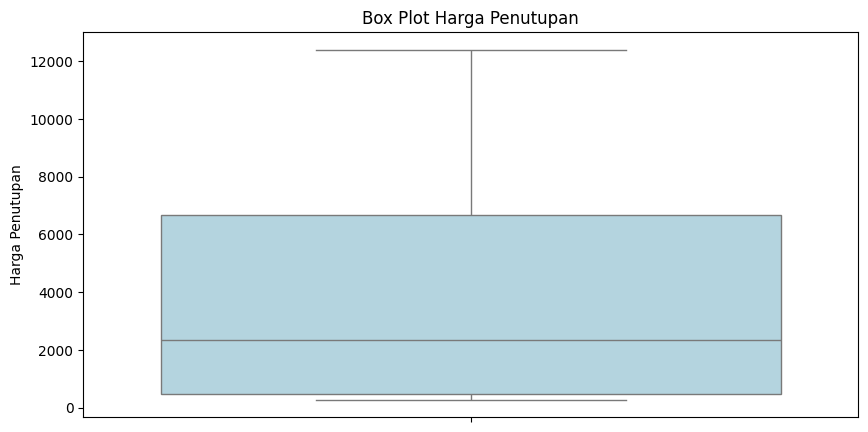

Statistik: 0.837, p-value: 0.000
Data tidak terdistribusi normal (menolak hipotesis nol)


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df['Close'], color='lightblue')
plt.title('Box Plot Harga Penutupan')
plt.ylabel('Harga Penutupan')
plt.show()

# Uji Normalitas (Contoh: Uji Shapiro-Wilk)
from scipy import stats

stat, p = stats.shapiro(df['Close'].dropna())
print('Statistik: %.3f, p-value: %.3f' % (stat, p))
if p > 0.05:
    print('Data terdistribusi normal (gagal menolak hipotesis nol)')
else:
    print('Data tidak terdistribusi normal (menolak hipotesis nol)')


#Preprocessing Data

1. Preprocessing data adalah langkah awal yang sangat penting dalam analisis data dan pembelajaran mesin (machine learning) yang bertujuan untuk mempersiapkan data mentah agar dapat digunakan secara efektif dalam model analisis atau algoritma. Proses ini melibatkan berbagai teknik dan langkah untuk membersihkan, mengubah, dan menyusun data sehingga siap untuk analisis lebih lanjut.

2. Tujuan Preprocessing Data
- Meningkatkan Kualitas Data: Mengurangi kesalahan, kebisingan, dan inkonsistensi dalam data.
- Memudahkan Analisis: Membuat data lebih mudah dianalisis dan diinterpretasikan.
- Meningkatkan Kinerja Model: Mengoptimalkan data untuk meningkatkan akurasi dan efektivitas model pembelajaran mesin.

In [ ]:
#mengidentifikasi dan menghapus data duplikat
df.drop_duplicates(inplace=True)

In [ ]:
#menghitung dan menampilkan jumlah nilai yang hilang

missing_values = df.isnull().sum()
print("jumlah missing value : ")
print(missing_values)

jumlah missing value : 
Open            1
High            1
Low             1
Close           0
Adj Close       1
Volume          1
Moving_Avg    176
dtype: int64


In [ ]:
#mengisi nilai yang hilang dengan metode forward will
df.ffill(inplace=True)  # Mengisi nilai yang hilang dengan nilai sebelumnya

In [ ]:
#pengecekan ulang
missing_values = df.isnull().sum()
print("jumlah missing value : ")
print(missing_values)

jumlah missing value : 
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Moving_Avg    4
dtype: int64


In [ ]:
#normalisasi

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Kolom yang akan dinormalisasi
cols_to_normalize = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Melakukan normalisasi
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# Menampilkan data setelah dinormalisasi
print(df.head())

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2000-10-02  0.012270  0.012424  0.014953  0.011959   0.008713  0.058207   
2000-10-03  0.011861  0.012016  0.013084  0.009897   0.007211  0.115757   
2000-10-04  0.009816  0.009776  0.011215  0.009278   0.006760  0.206228   
2000-10-05  0.008998  0.010183  0.012253  0.009897   0.007211  0.143051   
2000-10-06  0.009816  0.009776  0.012046  0.009278   0.006760  0.046904   

            Moving_Avg  
Date                    
2000-10-02         NaN  
2000-10-03         NaN  
2000-10-04         NaN  
2000-10-05         NaN  
2000-10-06       397.0  


Penjelasan Tentang NaN dan Moving Average

- NaN (Not a Number): Nilai NaN pada kolom Moving_Avg menunjukkan bahwa tidak ada cukup data untuk menghitung rata-rata bergerak pada hari-hari awal. Rata-rata bergerak 5-hari memerlukan data dari 5 hari sebelumnya, sehingga pada hari pertama hingga keempat, tidak ada nilai yang dapat dihitung, sehingga menghasilkan NaN.

In [ ]:
# Membagi data menjadi data training dan testing (misalnya 80%-20%)
train_size = int(len(data) * 0.8)  # Menghitung ukuran data pelatihan
train_data = data[:train_size]      # Mengambil 80% pertama sebagai data pelatihan
test_data = data[train_size:]        # Mengambil sisa 20% sebagai data pengujian

print("Data Training:", train_data.shape)  # Menampilkan bentuk data pelatihan
print("Data Testing:", test_data.shape)    # Menampilkan bentuk data pengujian


Data Training: (3968,)
Data Testing: (992,)


In [ ]:
# Melihat data yang telah diproses
print(df.head())

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2000-10-02  0.012270  0.012424  0.014953  0.011959   0.008713  0.058207   
2000-10-03  0.011861  0.012016  0.013084  0.009897   0.007211  0.115757   
2000-10-04  0.009816  0.009776  0.011215  0.009278   0.006760  0.206228   
2000-10-05  0.008998  0.010183  0.012253  0.009897   0.007211  0.143051   
2000-10-06  0.009816  0.009776  0.012046  0.009278   0.006760  0.046904   

            Moving_Avg  
Date                    
2000-10-02         NaN  
2000-10-03         NaN  
2000-10-04         NaN  
2000-10-05         NaN  
2000-10-06       397.0  


#Sliding Window

**Sliding window** adalah teknik yang digunakan dalam analisis data, terutama dalam konteks pemrosesan sinyal dan analisis deret waktu (time series). Konsep dasarnya adalah untuk mengambil potongan (window) dari data yang bergerak seiring waktu. Ini berguna untuk mengekstrak fitur dari data yang bersifat temporer atau berurutan.

### Konsep Sliding Window

1. **Definisi**:
   - Sliding window adalah metode di mana sebuah "jendela" berukuran tetap bergerak sepanjang data. Dalam setiap posisi, window tersebut dapat mengambil subset data untuk analisis lebih lanjut.

2. **Ukuran Window**:
   - Ukuran window adalah jumlah data point yang akan dianalisis dalam satu waktu. Misalnya, jika ukuran window adalah 5, maka setiap analisis atau perhitungan akan dilakukan pada 5 data point berturut-turut.

3. **Pergerakan Window**:
   - Setelah analisis dilakukan pada posisi saat ini, window kemudian digeser ke posisi berikutnya. Ini bisa dilakukan dengan menggeser satu data point (stride = 1) atau lebih (stride > 1), tergantung pada aplikasi.

### Aplikasi Sliding Window

1. **Pengolahan Sinyal**: Untuk menghaluskan sinyal atau menghitung rata-rata bergerak (moving average).
2. **Analisis Data Waktu**: Untuk mengekstrak fitur dari data deret waktu, seperti mean, variance, atau menghitung model prediksi.
3. **Deteksi Anomali**: Mengidentifikasi pola yang tidak biasa dalam data.
4. **Model Machine Learning**: Dalam pelatihan model, terutama untuk data yang memiliki sifat temporal, sliding window memungkinkan model untuk belajar dari pola dalam data yang berurutan.

### Keuntungan dan Kerugian

- **Keuntungan**:
  - Memungkinkan analisis yang berkelanjutan dan real-time.
  - Menghasilkan fitur yang lebih informatif dengan mempertimbangkan konteks temporal.

- **Kerugian**:
  - Memerlukan pengaturan parameter seperti ukuran window dan stride, yang dapat mempengaruhi hasil.
  - Potensi kehilangan informasi di pinggiran jika tidak menggunakan teknik yang tepat.


In [ ]:
import pandas as pd

# Membaca data saham
df = pd.read_csv('icbp.csv')

# Mengubah kolom Date menjadi format datetime dan set index Date
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Menggunakan kolom 'Close' sebagai contoh untuk time series
data = df['Close'].values

# Parameter untuk sliding window
window_size = 5  # Ukuran jendela
stride = 1       # Langkah penggeseran jendela

# Membuat list untuk menyimpan fitur dan target
features = []
targets = []

# Sliding window
for i in range(0, len(data) - window_size):
    window = data[i:i + window_size]  # Mengambil jendela
    features.append(window)            # Menyimpan fitur
    targets.append(data[i + window_size])  # Target adalah harga berikutnya

# Mengonversi menjadi DataFrame
features_df = pd.DataFrame(features, columns=[f'Day_{j+1}' for j in range(window_size)])
targets_df = pd.DataFrame(targets, columns=['Target'])

# Menggabungkan fitur dan target
sliding_window_df = pd.concat([features_df, targets_df], axis=1)

# Menampilkan hasil

sliding_window_df.head()


,Day_1,Day_2,Day_3,Day_4,Day_5,Target
0,420.0,395.0,387.5,395.0,387.5,377.5
1,395.0,387.5,395.0,387.5,377.5,375.0
2,387.5,395.0,387.5,377.5,375.0,385.0
3,395.0,387.5,377.5,375.0,385.0,390.0
4,387.5,377.5,375.0,385.0,390.0,395.0


In [ ]:
#prediksi model dengan logistic regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fungsi untuk membuat sliding window dan label
def create_sliding_window_with_labels(data, window_size=5):
    close_prices = data['Close']
    windows = []
    labels = []

    for i in range(len(close_prices) - window_size):
        windows.append(close_prices[i:i + window_size].values)
        if close_prices.iloc[i + window_size] > close_prices.iloc[i + window_size - 1]:
            labels.append(1)
        else:
            labels.append(0)

    return np.array(windows), np.array(labels)

# Membaca data saham
data = pd.read_csv('icbp.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Memeriksa nilai yang hilang
print("Jumlah nilai yang hilang di setiap kolom:")
print(data.isnull().sum())

# Mengisi nilai NaN dengan rata-rata atau menghapus baris yang memiliki NaN
data.fillna(data.mean(), inplace=True)  # atau data.dropna(inplace=True)

# Membuat sliding window dan label dengan ukuran window 5
X, y = create_sliding_window_with_labels(data, window_size=5)

# Membagi data menjadi training dan testing set (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melatih model Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data test
y_pred = model.predict(X_test_scaled)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy:.2f}')

# Menampilkan beberapa prediksi pertama
print("Prediksi pertama vs Aktual:")
for i in range(10):
    print(f"Prediksi: {y_pred[i]}, Aktual: {y_test[i]}")


Jumlah nilai yang hilang di setiap kolom:
Open         70
High         70
Low          70
Close        70
Adj Close    70
Volume       70
dtype: int64
Akurasi model: 0.62
Prediksi pertama vs Aktual:
Prediksi: 0, Aktual: 0
Prediksi: 0, Aktual: 0
Prediksi: 0, Aktual: 0
Prediksi: 0, Aktual: 0
Prediksi: 0, Aktual: 0
Prediksi: 0, Aktual: 0
Prediksi: 0, Aktual: 1
Prediksi: 0, Aktual: 0
Prediksi: 0, Aktual: 1
Prediksi: 0, Aktual: 0


**Prediksi menggunakan Logistic Regression** adalah metode statistik yang digunakan untuk memodelkan hubungan antara satu atau lebih variabel independen dan variabel dependen biner (dua kelas). Logistic Regression sering digunakan dalam analisis klasifikasi untuk memprediksi kemungkinan terjadinya suatu peristiwa. Berikut adalah penjelasan lebih lanjut tentang Logistic Regression, cara kerjanya, dan aplikasinya.

### Apa itu Logistic Regression?

Logistic Regression adalah model regresi yang digunakan ketika variabel target (dependen) bersifat kategorikal. Ini paling umum digunakan untuk memprediksi dua kelas, misalnya:
- Ya/Tidak
- Sukses/Gagal
- Penyakit/Tidak Penyakit

Model ini menghitung probabilitas bahwa suatu instance termasuk dalam kelas tertentu dan kemudian memutuskan kelas berdasarkan probabilitas tersebut.

### Langkah-langkah dalam Prediksi Menggunakan Logistic Regression

1. **Persiapan Data**:
   - Kumpulkan data yang akan digunakan.
   - Pisahkan data menjadi fitur (independen) dan label (dependen).
   - Lakukan pra-pemrosesan data, seperti normalisasi atau encoding variabel kategorikal jika diperlukan.

2. **Membagi Data**:
   - Bagi dataset menjadi dua bagian: data pelatihan dan data pengujian.

3. **Membangun Model**:
   - Gunakan library seperti scikit-learn untuk membangun model Logistic Regression.
   - Latih model menggunakan data pelatihan.

4. **Prediksi**:
   - Gunakan model yang dilatih untuk memprediksi kelas pada data pengujian.
   - Hasil prediksi biasanya berupa probabilitas yang kemudian dikategorikan menjadi kelas.

5. **Evaluasi Model**:
   - Evaluasi hasil prediksi menggunakan metrik seperti akurasi, precision, recall, dan F1-score.
   - Gunakan confusion matrix untuk memahami performa model.




### Kelebihan dan Kekurangan

#### Kelebihan:
- **Sederhana dan Mudah Dipahami**: Mudah diinterpretasikan dan digunakan.
- **Hasil Probabilitas**: Memberikan output probabilitas untuk klasifikasi, yang berguna dalam banyak aplikasi.
- **Efisien untuk Klasifikasi Dua Kelas**: Sangat efisien untuk model yang hanya memiliki dua kelas.

#### Kekurangan:
- **Hanya untuk Klasifikasi Biner**: Meski dapat diperluas untuk beberapa kelas, itu bisa jadi lebih kompleks.
- **Asumsi Linieritas**: Model ini mengasumsikan hubungan linier antara fitur dan log-odds, yang mungkin tidak selalu benar.
- **Sensitif terhadap Outlier**: Dapat dipengaruhi oleh nilai pencilan yang ekstrem.

### Aplikasi

Logistic Regression banyak digunakan dalam berbagai bidang, termasuk:
- **Kedokteran**: Untuk memprediksi kemungkinan penyakit berdasarkan gejala.
- **Pemasaran**: Untuk memprediksi apakah seorang pelanggan akan membeli produk.
- **Keuangan**: Untuk menentukan kemungkinan default pada pinjaman.

Dengan menggunakan Logistic Regression, kita dapat membuat model yang kuat untuk memprediksi hasil berdasarkan data historis dan melakukan analisis yang mendalam.

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0131
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 6.8710e-04
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.2329e-04
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.7195e-04
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.3926e-04
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.9482e-04
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.7799e-04
Epoch 8/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 4.7181e-04
Epoch 9/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.8217e-04
Epoch 10/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.6623e-04
Epoch 11/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.5009e-04
Epoch 12/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.0969e-04
Epoch 13/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.8580e-04
Epoch 14/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.9947e-04
Epoch 15/5

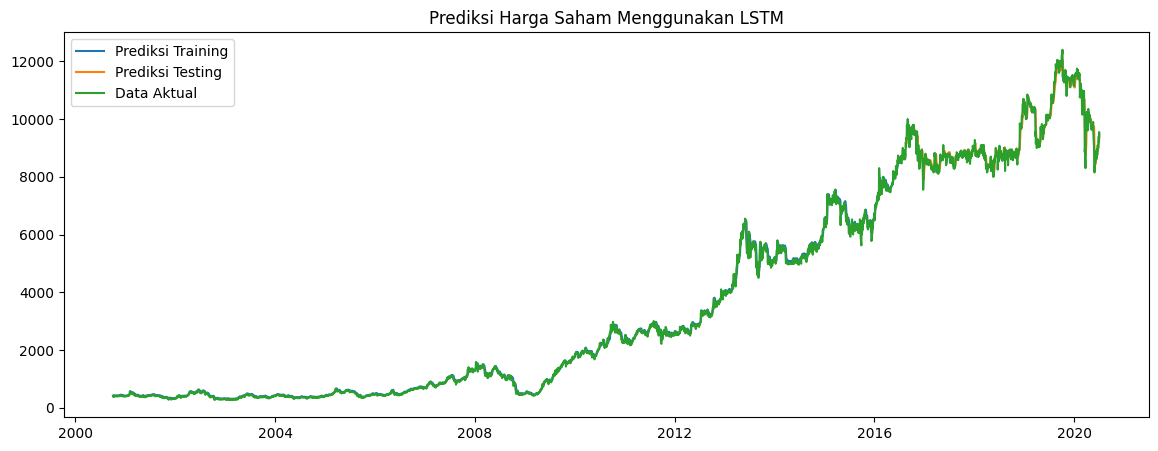

In [ ]:
#prediksi model dengan metode lstm
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Membaca data saham
data = pd.read_csv('icbp.csv')

# Mengubah kolom Date menjadi format datetime dan set index Date
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Mengisi nilai NaN dengan forward fill
data['Close'] = data['Close'].ffill()

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Membagi data menjadi training dan testing (80% training, 20% testing)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Fungsi untuk membuat dataset dengan sliding window
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

# Membuat dataset
window_size = 5
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Mengubah bentuk input menjadi [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Membangun model LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer

# Mengompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Melakukan prediksi
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invers transformasi prediksi ke skala aslinya
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualisasi hasil prediksi
plt.figure(figsize=(14, 5))
plt.plot(data.index[window_size:len(train_predict) + window_size], train_predict, label='Prediksi Training')

# Perbaiki index untuk test_predict
test_index_start = len(train_predict) + window_size * 2
test_index_end = test_index_start + len(test_predict)
plt.plot(data.index[test_index_start:test_index_end], test_predict, label='Prediksi Testing')

plt.plot(data.index, data['Close'], label='Data Aktual')
plt.title('Prediksi Harga Saham Menggunakan LSTM')
plt.legend()
plt.show()



**Prediksi model dengan metode LSTM (Long Short-Term Memory)** adalah teknik yang digunakan untuk memodelkan dan memprediksi data deret waktu (time series) atau urutan data (sequential data). LSTM adalah jenis jaringan saraf tiruan (neural network) yang dirancang khusus untuk mengatasi masalah pembelajaran jangka panjang dan memori yang sering terjadi pada model jaringan saraf tradisional, seperti RNN (Recurrent Neural Networks).

### Apa itu LSTM?

LSTM adalah arsitektur jaringan saraf yang memiliki kemampuan untuk mengingat informasi dalam waktu yang lebih lama. Ini sangat berguna untuk data urutan, seperti teks, suara, atau data deret waktu, di mana informasi penting dari langkah waktu sebelumnya mungkin mempengaruhi prediksi di langkah waktu selanjutnya.

### Komponen Utama LSTM

LSTM memiliki tiga komponen utama yang dikenal sebagai **gerbang** (gates):

1. **Gerbang Lupa (Forget Gate)**:
   - Memutuskan informasi mana yang akan dilupakan dari memori. Ini diatur oleh neuron yang menggunakan fungsi sigmoid, yang mengeluarkan nilai antara 0 dan 1.
   - Jika output gerbang ini 0, berarti informasi tersebut akan dilupakan sepenuhnya; jika 1, informasi akan dipertahankan sepenuhnya.

2. **Gerbang Input (Input Gate)**:
   - Menentukan informasi baru yang akan disimpan dalam sel memori. Ini juga menggunakan fungsi sigmoid untuk menentukan nilai mana yang akan diperbarui.

3. **Gerbang Output (Output Gate)**:
   - Mengontrol informasi mana yang akan dikeluarkan dari sel memori. Ini menghasilkan output yang kemudian akan digunakan untuk prediksi.

### Cara Kerja LSTM dalam Prediksi

1. **Input Data**:
   - Data urutan (misalnya, harga saham, cuaca, atau data sekuensial lainnya) diumpankan ke model LSTM.

2. **Proses Pembelajaran**:
   - Model LSTM dilatih dengan menggunakan data urutan untuk mempelajari pola dan hubungan dalam data. Proses ini melibatkan propagasi maju (forward propagation) dan pembaruan bobot (weight update) berdasarkan kesalahan prediksi.

3. **Memprediksi Output**:
   - Setelah model dilatih, ia dapat digunakan untuk memprediksi nilai berikutnya dalam urutan berdasarkan input sebelumnya.

### Langkah-langkah dalam Membangun Model LSTM

Berikut adalah langkah-langkah umum untuk membangun model LSTM untuk prediksi:

1. **Persiapan Data**:
   - Kumpulkan dan pra-proses data. Misalnya, mengonversi data menjadi format yang sesuai, menormalkan nilai, dan membuat sliding window untuk data deret waktu.

2. **Membagi Data**:
   - Bagi dataset menjadi data pelatihan dan data pengujian.

3. **Membangun Model LSTM**:
   - Gunakan library seperti Keras atau TensorFlow untuk membangun arsitektur model LSTM.

4. **Melatih Model**:
   - Latih model menggunakan data pelatihan. Selama proses ini, model belajar dari pola dalam data.

5. **Melakukan Prediksi**:
   - Gunakan model yang dilatih untuk memprediksi nilai pada data pengujian atau data baru.

6. **Evaluasi Model**:
   - Evaluasi hasil prediksi dengan menggunakan metrik seperti RMSE (Root Mean Squared Error) atau MAE (Mean Absolute Error).

### Kelebihan dan Kekurangan LSTM

#### Kelebihan:
- **Mengatasi Masalah Vanishing Gradient**: LSTM dirancang untuk mengatasi masalah ini, sehingga lebih efektif dalam menangkap ketergantungan jangka panjang.
- **Fleksibilitas**: Dapat digunakan untuk berbagai jenis data urutan, termasuk teks, suara, dan data deret waktu.

#### Kekurangan:
- **Kompleksitas Model**: Memiliki lebih banyak parameter dibandingkan dengan model sederhana, yang dapat menyebabkan waktu pelatihan yang lebih lama.
- **Kebutuhan Data Besar**: Memerlukan dataset yang cukup besar untuk melatih model dengan baik.

### Aplikasi LSTM

LSTM banyak digunakan dalam berbagai bidang, seperti:
- **Prediksi Deret Waktu**: Memprediksi harga saham, cuaca, atau tren penjualan.
- **Pemrosesan Bahasa Alami (NLP)**: Untuk menerjemahkan teks, analisis sentimen, atau pengenalan suara.
- **Pengolahan Sinyal**: Dalam analisis suara dan video.

Dengan menggunakan LSTM, kita dapat membuat model yang dapat menangkap pola dan ketergantungan dalam data urutan untuk melakukan prediksi yang akurat.

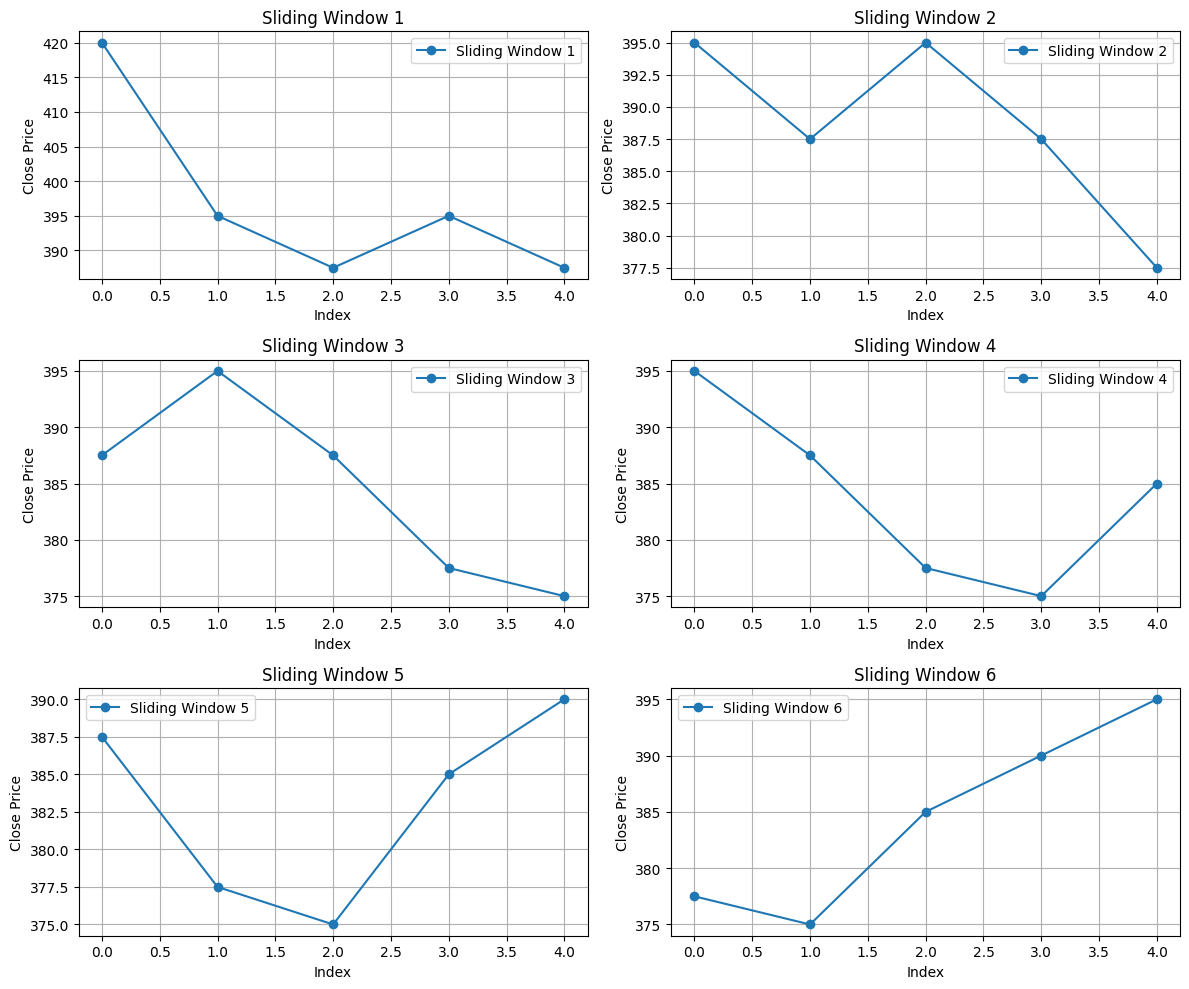

In [28]:
#visualisasi sliding windows
import matplotlib.pyplot as plt

# Fungsi untuk membuat sliding window
def create_sliding_window(data, window_size=6):  # Ubah window_size menjadi 5
    # Mengambil data dari kolom 'Close' saham
    close_prices = data['Close']

    # Membuat sliding window menggunakan pandas rolling dan shifting
    sliding_windows = pd.DataFrame([close_prices.shift(-i) for i in range(window_size)]).T.dropna().values

    return sliding_windows

# Membaca data saham
data = pd.read_csv('icbp.csv')

# Mengubah kolom Date menjadi format datetime dan set index Date
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Membuat sliding window dengan ukuran 5
sliding_windows = create_sliding_window(data, window_size=5)

# Membuat figure dan axis untuk 5 subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 10))  # Mengatur layout untuk 3x2 subplots

# Menampilkan sliding windows pada setiap plot
for i in range(6):  # Menampilkan 5 sliding windows
    ax = axs[i//2, i%2]  # Mengatur posisi subplot
    ax.plot(sliding_windows[i], marker='o', linestyle='-', label=f'Sliding Window {i+1}')
    ax.set_title(f'Sliding Window {i+1}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Close Price')
    ax.legend()
    ax.grid(True)

# Menampilkan keseluruhan plot
plt.tight_layout()
plt.show()


#Ensemble Bagging

**Ensemble Bagging** (Bootstrap Aggregating) adalah salah satu teknik dalam *ensemble learning* yang bertujuan untuk meningkatkan performa model prediktif dengan menggabungkan prediksi dari beberapa model yang berbeda, sering disebut sebagai "estimators" atau "base models." Ide utama dari ensemble bagging adalah mengurangi varians model dan meningkatkan akurasi prediksi dengan membuat beberapa model yang berbeda dari dataset yang sama dan kemudian menggabungkan prediksi mereka.

### Bagaimana Bagging Bekerja:
1. **Resampling Data dengan Bootstrap:**
   - Dataset pelatihan asli di-*resample* beberapa kali menggunakan teknik bootstrap (sampling dengan penggantian). Ini berarti bahwa dari dataset pelatihan yang sama, beberapa subset data diambil secara acak dengan penggantian, memungkinkan beberapa poin data muncul lebih dari sekali dalam satu subset.

2. **Membangun Model pada Setiap Subset:**
   - Untuk setiap subset data yang berbeda, sebuah model (misalnya, decision tree) dilatih. Model-model ini bisa sama atau berbeda tergantung pada implementasinya, tetapi dalam bagging klasik, model yang sama (biasanya decision tree) digunakan untuk setiap subset data.

3. **Menggabungkan Prediksi:**
   - Setelah model-model individual dilatih, prediksi dari setiap model digabungkan untuk menghasilkan prediksi akhir. Cara menggabungkannya tergantung pada jenis tugas:
     - Untuk **regresi**: menggunakan rata-rata (*average*) dari semua prediksi model.
     - Untuk **klasifikasi**: menggunakan pemungutan suara mayoritas (*majority voting*).

### Manfaat Bagging:
1. **Mengurangi Varians**:
   - Model tunggal, seperti decision tree, bisa sangat rentan terhadap variasi kecil dalam data (overfitting), menghasilkan model yang tidak stabil. Dengan bagging, varians model berkurang karena gabungan model lebih stabil daripada model individual.
   
2. **Meningkatkan Akurasi**:
   - Dengan menggabungkan prediksi dari beberapa model, akurasi prediksi dapat ditingkatkan dibandingkan dengan menggunakan satu model saja.

3. **Mencegah Overfitting**:
   - Bagging bekerja sangat baik dalam mencegah overfitting pada model yang rentan terhadap varian tinggi, seperti decision tree.

### Contoh Algoritma yang Menggunakan Bagging:
- **Random Forest** adalah contoh paling populer dari bagging. Random forest menggunakan decision tree sebagai *base model*, tetapi juga menambahkan aspek acak dalam pemilihan fitur untuk setiap subset data, menjadikannya lebih kuat dalam menghindari overfitting.

### Kapan Menggunakan Bagging:
Bagging paling cocok digunakan ketika model yang digunakan rentan terhadap overfitting (misalnya decision tree) dan ketika data memiliki variabilitas yang tinggi. Dalam kasus di mana model overfitting terhadap data, bagging bisa sangat efektif untuk meningkatkan performa model.

### Ilustrasi Sederhana Bagging:
Misalkan kita memiliki data saham. Dengan menggunakan bagging, kita bisa:
- Membuat beberapa subset dari data harga saham menggunakan bootstrap.
- Melatih beberapa decision tree untuk memprediksi harga saham masa depan berdasarkan subset-subset ini.
- Menggabungkan prediksi dari semua decision tree tersebut untuk membuat prediksi akhir, misalnya dengan mengambil rata-rata dari semua prediksi model tersebut.


Jumlah sampel X: 4843
Jumlah sampel y: 4843
Data dengan kolom Prediksi:
              Close     Prediksi
Date                           
2020-06-19  8925.0   351.375105
2020-06-22  9100.0  2537.526384
2020-06-23  8925.0  9930.345238
2020-06-24  9075.0  7482.500000
2020-06-25  8975.0  2480.854167
2020-06-26  9225.0  8738.734289
2020-06-29  9400.0   466.334199
2020-06-30  9350.0   699.454545
2020-07-01  9200.0   550.416667
2020-07-02  9550.0   410.995482


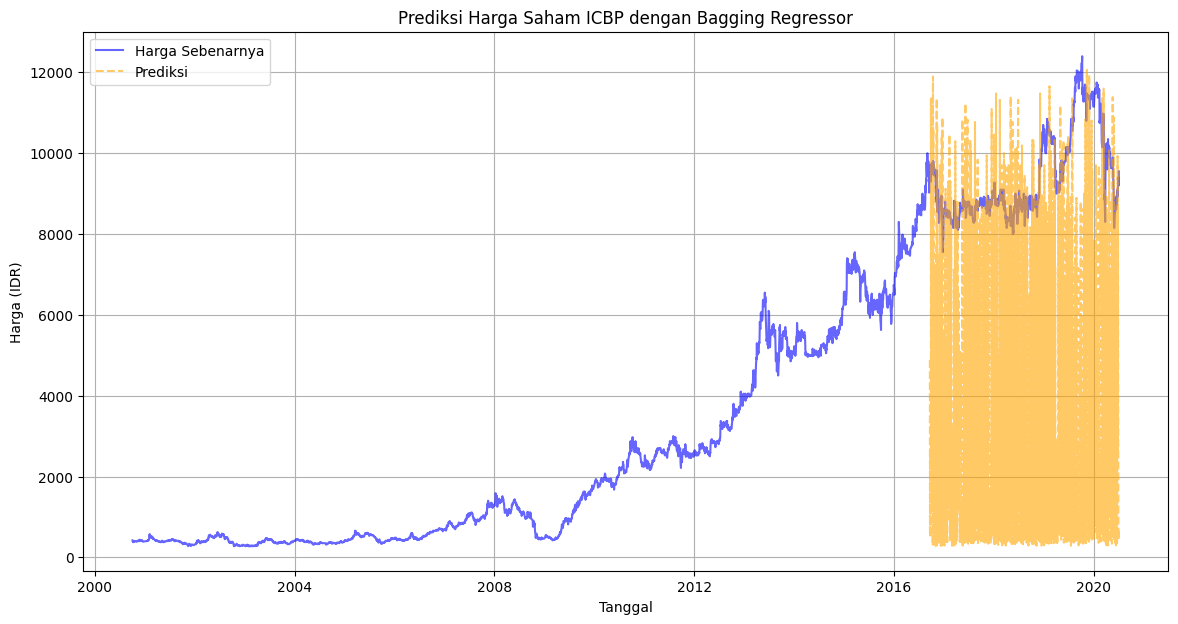

In [29]:
#prediksi menggunakan metode bagging regressor
# Langkah 3: Menyiapkan data untuk model
data['Target'] = data['Close'].shift(-1)  # Menggunakan harga penutupan berikutnya sebagai target
data.dropna(inplace=True)  # Hapus baris dengan nilai NaN yang mungkin muncul karena penggeseran

X = data[['Close']]  # Ambil fitur harga penutupan
y = data['Target']  # Ambil target

# Memastikan panjang X dan y konsisten
print("Jumlah sampel X:", len(X))
print("Jumlah sampel y:", len(y))

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data ke dalam train-test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Langkah 4: Membuat model Bagging Regressor
model = BaggingRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Langkah 5: Melakukan prediksi
y_pred = model.predict(X_test)

# Menambahkan prediksi ke DataFrame asli untuk analisis lebih lanjut
data['Prediksi'] = np.nan
data.loc[data.index[-len(y_pred):], 'Prediksi'] = y_pred  # Mengisi kolom prediksi dengan hasil

# Memeriksa DataFrame setelah menambahkan kolom prediksi
print("Data dengan kolom Prediksi:\n", data[['Close', 'Prediksi']].tail(10))  # Menggunakan tail untuk melihat akhir DataFrame

# Langkah 6: Visualisasi hasil
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Harga Sebenarnya', color='blue', alpha=0.6)
plt.plot(data['Prediksi'], label='Prediksi', color='orange', linestyle='--', alpha=0.6)
plt.title('Prediksi Harga Saham ICBP dengan Bagging Regressor')
plt.xlabel('Tanggal')
plt.ylabel('Harga (IDR)')
plt.legend()
plt.grid()
plt.show()


Bagging Regressor adalah teknik ensemble yang digunakan untuk meningkatkan akurasi dan stabilitas model regresi dengan cara menggabungkan beberapa model yang lebih lemah (biasanya model regresi) untuk menghasilkan satu model yang lebih kuat. Berikut adalah penjelasan lebih rinci tentang cara kerja dan prinsip dasar dari Bagging Regressor:

### 1. **Pengertian Bagging**
- **Bagging** (Bootstrap Aggregating) adalah metode yang digunakan untuk mengurangi variabilitas model dengan cara mengambil sampel data secara acak dari dataset asli, kemudian melatih model terpisah pada setiap sampel tersebut.
- Tujuan dari bagging adalah untuk meningkatkan ketahanan dan akurasi model dengan mengurangi overfitting yang sering terjadi pada model yang kompleks.

### 2. **Cara Kerja Bagging Regressor**
- **Bootstrap Sampling**: Bagging dimulai dengan membuat beberapa subset dari data pelatihan dengan cara pengambilan sampel secara acak dengan pengembalian (bootstrap). Ini berarti bahwa satu data bisa muncul lebih dari sekali dalam satu subset.
  
- **Pelatihan Model**: Model regresi yang sama (seperti Decision Tree, Linear Regression, dll.) dilatih secara terpisah pada masing-masing subset data.
  
- **Penggabungan Hasil**: Setelah semua model dilatih, prediksi dari setiap model digabungkan. Untuk model regresi, ini biasanya dilakukan dengan menghitung rata-rata dari semua prediksi yang dihasilkan oleh model-model tersebut.

### 3. **Keunggulan Bagging Regressor**
- **Mengurangi Overfitting**: Dengan menggabungkan beberapa model, bagging membantu mengurangi risiko overfitting, yang sering terjadi jika menggunakan model tunggal yang kompleks.
- **Meningkatkan Akurasi**: Dengan memanfaatkan kekuatan dari beberapa model, Bagging Regressor seringkali menghasilkan prediksi yang lebih akurat dibandingkan dengan model individu.
- **Kestabilan**: Model yang dihasilkan lebih stabil terhadap fluktuasi data pelatihan karena tidak bergantung pada satu set data saja.

### 4. **Implementasi**
- Dalam praktiknya, Bagging Regressor dapat diimplementasikan menggunakan pustaka seperti Scikit-learn. Berikut adalah langkah-langkah dasar untuk menggunakannya:
  1. Mengimpor library yang diperlukan (seperti `pandas`, `numpy`, dan `BaggingRegressor` dari `sklearn`).
  2. Membaca dan mempersiapkan data.
  3. Membagi data menjadi set pelatihan dan pengujian.
  4. Membuat dan melatih model `BaggingRegressor`.
  5. Melakukan prediksi dan mengevaluasi kinerja model.



### 6. **Kesimpulan**
Bagging Regressor adalah metode yang kuat untuk meningkatkan akurasi model regresi dengan menggabungkan prediksi dari beberapa model yang lebih sederhana. Dengan pendekatan ini, kita dapat memperoleh hasil yang lebih baik, lebih stabil, dan lebih sedikit terpengaruh oleh noise dalam data.

#RMSE

**RMSE (Root Mean Square Error)** adalah salah satu metrik evaluasi yang sering digunakan untuk mengukur seberapa baik model regresi dalam melakukan prediksi. RMSE menghitung akar kuadrat dari rata-rata kuadrat selisih antara nilai prediksi dengan nilai sebenarnya.


### Mengapa RMSE Penting?
- RMSE memberikan ukuran rata-rata seberapa jauh prediksi model dari nilai sebenarnya.
- Metrik ini sensitif terhadap outlier karena menggunakan kuadrat dari selisih. Artinya, kesalahan yang besar akan memberikan dampak lebih besar pada hasil RMSE.
- Semakin kecil nilai RMSE, semakin baik performa model, karena menunjukkan bahwa prediksi model semakin dekat dengan nilai sebenarnya.

### Interpretasi:
- **RMSE rendah**: Prediksi model sangat mendekati nilai sebenarnya.
- **RMSE tinggi**: Prediksi model jauh dari nilai sebenarnya.

RMSE sering digunakan dalam banyak aplikasi regresi, seperti prediksi harga saham, suhu, permintaan produk, dll., untuk mengevaluasi akurasi model.

In [34]:
#RMSE
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Langkah 1: Membaca data saham
data = pd.read_csv('icbp.csv')

# Langkah 2: Mengonversi kolom 'Date' menjadi format datetime dan menyeting index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Langkah 3: Menyiapkan data untuk model
data['Target'] = data['Close'].shift(-1)  # Menggunakan harga penutupan berikutnya sebagai target
data.dropna(inplace=True)  # Hapus baris dengan nilai NaN yang mungkin muncul karena penggeseran

X = data[['Close']]  # Ambil fitur harga penutupan
y = data['Target']  # Ambil target

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membagi data ke dalam train-test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Langkah 4: Membuat model Bagging Regressor
base_estimator = DecisionTreeRegressor(random_state=42)

# Membuat ensemble Bagging Regressor
model = BaggingRegressor(estimator=base_estimator, n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Langkah 5: Melakukan prediksi
y_pred = model.predict(X_test)

# Langkah 6: Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE dari model Bagging Regressor: {rmse:.4f}')


RMSE dari model Bagging Regressor: 104.4830
